In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

D0601 04:30:18.484944585      13 config.cc:119]                        gRPC EXPERIMENT tcp_frame_size_tuning               OFF (default:OFF)
D0601 04:30:18.484980950      13 config.cc:119]                        gRPC EXPERIMENT tcp_rcv_lowat                       OFF (default:OFF)
D0601 04:30:18.484985027      13 config.cc:119]                        gRPC EXPERIMENT peer_state_based_framing            OFF (default:OFF)
D0601 04:30:18.484988185      13 config.cc:119]                        gRPC EXPERIMENT flow_control_fixes                  ON  (default:ON)
D0601 04:30:18.484990988      13 config.cc:119]                        gRPC EXPERIMENT memory_pressure_controller          OFF (default:OFF)
D0601 04:30:18.484994034      13 config.cc:119]                        gRPC EXPERIMENT unconstrained_max_quota_buffer_size OFF (default:OFF)
D0601 04:30:18.484997076      13 config.cc:119]                        gRPC EXPERIMENT new_hpack_huffman_decoder           ON  (default:ON)
D0601 04:30:18.

(96, 96, 3)


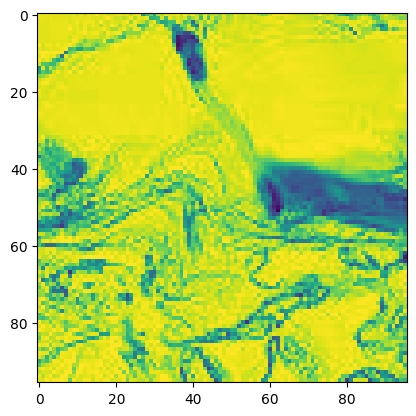

In [3]:
from PIL import Image
import matplotlib.pyplot as plt


img = Image.open(r'/kaggle/input/histopathologic-cancer-detection/train/000020de2aa6193f4c160e398a8edea95b1da598.tif')
img = np.array(img); print(img.shape)
plt.imshow(img[:,:,1])


In [4]:
fil_lst= os.listdir("/kaggle/input/histopathologic-cancer-detection/train")
train_files = fil_lst[0:150000]; 
train_size = 500
x_train = np.empty((train_size,96,96,3))
for i in range(train_size):
    img = Image.open(r'/kaggle/input/histopathologic-cancer-detection/train/'+train_files[i])
    x_train[i,:,:,:] = np.array(img);

df = pd.read_csv('/kaggle/input/histopathologic-cancer-detection/train_labels.csv')
print(df.head())
y_data = np.array(df['label']); 
y_train = y_data[:train_size]

                                         id  label
0  f38a6374c348f90b587e046aac6079959adf3835      0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
2  755db6279dae599ebb4d39a9123cce439965282d      0
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08      0
4  068aba587a4950175d04c680d38943fd488d6a9d      0


In [5]:
fil_lst_tst= os.listdir("/kaggle/input/histopathologic-cancer-detection/test")
train_files_tst = fil_lst_tst[:]; 
train_size_tst = len(train_files_tst)
x_test = np.empty((train_size_tst,96,96,3))
for i in range(train_size_tst):
    img = Image.open(r'/kaggle/input/histopathologic-cancer-detection/test/'+train_files_tst[i])
    x_test[i,:,:,:] = np.array(img);

test = pd.read_csv('/kaggle/input/histopathologic-cancer-detection/sample_submission.csv')
print(test.head())

                                         id  label
0  0b2ea2a822ad23fdb1b5dd26653da899fbd2c0d5      0
1  95596b92e5066c5c52466c90b69ff089b39f2737      0
2  248e6738860e2ebcf6258cdc1f32f299e0c76914      0
3  2c35657e312966e9294eac6841726ff3a748febf      0
4  145782eb7caa1c516acbe2eda34d9a3f31c41fd6      0


In [6]:
l1_reg= tf.keras.regularizers.L2(0.0005)
img_inputs = keras.Input(shape=(96, 96, 3))
x1= keras.layers.Conv2D(50,(3,3),padding="same",activation='relu',strides=1,kernel_initializer="glorot_uniform",kernel_regularizer=l1_reg)(img_inputs)
x1= keras.layers.MaxPool2D(2)(x1)
x1= keras.layers.Conv2D(50,(3,3),padding="same",activation='relu',strides=1,kernel_initializer="glorot_uniform",kernel_regularizer=l1_reg)(x1)
x2= keras.layers.Conv2D(50,(5,5),padding="same",activation='relu',strides=1,kernel_initializer="glorot_uniform",kernel_regularizer=l1_reg)(img_inputs)
x2= keras.layers.MaxPool2D(2)(x2)
x2= keras.layers.Conv2D(50,(5,5),padding="same",activation='relu',strides=1,kernel_initializer="glorot_uniform",kernel_regularizer=l1_reg)(x2)
x = keras.layers.Concatenate()([x1,x2])
x=  keras.layers.Conv2D(100,(3,3),padding="same",activation='relu',strides=1,kernel_initializer="glorot_uniform",kernel_regularizer=l1_reg)(x)
x= keras.layers.MaxPool2D(2)(x)
x= keras.layers.Conv2D(100,(3,3),padding="same",strides=1,activation='relu',kernel_initializer="glorot_uniform",kernel_regularizer=l1_reg)(x)
x= keras.layers.Flatten()(x)
x= keras.layers.Dense(1000,activation='relu',kernel_initializer="glorot_uniform",kernel_regularizer=l1_reg)(x)
x= keras.layers.Dense(200,activation='relu',kernel_initializer="glorot_uniform",kernel_regularizer=l1_reg)(x)
outputs= keras.layers.Dense(1,activation='sigmoid')(x)

model = keras.Model(inputs=img_inputs, outputs=outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 96, 96, 50)   1400        ['input_1[0][0]']                
                                                                                                  
 conv2d_2 (Conv2D)              (None, 96, 96, 50)   3800        ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 48, 48, 50)   0           ['conv2d[0][0]']                 
                                                                                              

In [7]:
opt = tf.keras.optimizers.SGD(learning_rate=0.0001)
los= tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer=opt,loss=los, metrics=['Accuracy'])

In [8]:
x_train= tf.convert_to_tensor(x_train); y_train= tf.convert_to_tensor(y_train)
model.fit(x_train,y_train,batch_size=50,epochs=50,validation_split=0.1)

Epoch 1/50
9/9 [==============================] - 8s 712ms/step - loss: 13.0894 - Accuracy: 0.5644 - val_loss: 2.3078 - val_Accuracy: 0.4600
Epoch 2/50
9/9 [==============================] - 6s 655ms/step - loss: 2.3640 - Accuracy: 0.5467 - val_loss: 2.3805 - val_Accuracy: 0.4000
Epoch 3/50
9/9 [==============================] - 6s 636ms/step - loss: 2.2857 - Accuracy: 0.5200 - val_loss: 2.4036 - val_Accuracy: 0.6000
Epoch 4/50
9/9 [==============================] - 6s 654ms/step - loss: 2.0317 - Accuracy: 0.5889 - val_loss: 2.0800 - val_Accuracy: 0.4800
Epoch 5/50
9/9 [==============================] - 6s 660ms/step - loss: 1.9350 - Accuracy: 0.6622 - val_loss: 2.0671 - val_Accuracy: 0.4800
Epoch 6/50
9/9 [==============================] - 6s 654ms/step - loss: 1.8444 - Accuracy: 0.7156 - val_loss: 2.0835 - val_Accuracy: 0.5200
Epoch 7/50
9/9 [==============================] - 6s 641ms/step - loss: 1.8042 - Accuracy: 0.7556 - val_loss: 2.1546 - val_Accuracy: 0.6000
Epoch 8/50
9/9 [===

In [9]:

y_pred = model.predict(x_test, batch_size=20)

2873/2873 [==============================] - 114s 39ms/step


In [10]:
test["label"] = y_pred

In [11]:
print(test.loc[25:50])

                                          id     label
25  4c3b7d71422fe2c35153a821c84538516ee89573  0.085981
26  edf908d325da428766464beb035c744e589e2ba0  0.189087
27  c68144b44b49d96d4b2e1870f854781a84ec3e20  0.222579
28  81d0aa3c20f021c2fc12a79c359ea29fa499425f  0.126843
29  564804ca8f0e05b7790108a24e7f2a36f1732375  0.296154
30  8fa59f50488309b0f0bbe931ff416118094d2ff7  0.081332
31  a66bd24337796d86c62f080c95939ba54a2c5125  0.482912
32  b2e728e2b03b46dce8699387912eddfa655230ed  0.079187
33  897bc5ac27b6dac879a3a3c6422ac48231a54e17  0.120087
34  a3f7dc59ad6208c52350569e2b8e2176eb45a4f2  0.423937
35  2ade3ffdc58a97d8a02fc968fb28de10de1c53da  0.152838
36  cda27248c63b1fbd62c69cbb0f401e5b82f0b5e3  0.184516
37  c7be682619bea4329db2066332d51d52698cab67  0.328350
38  1a44a1321514bd4a074a4b08aa6279a76887672c  0.052495
39  49abc1bef12526d5c4d4d13d11ee792a1302a7a4  0.162082
40  ed613fd86fce87047bd5a7f68c4384069d597deb  0.197974
41  38d4f639e1231013dac84fe9095e95ad78ad5982  0.409437
42  deb06a

In [12]:

y_prd = np.rint(y_pred);
print(y_prd[:10])

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [13]:
test["label"] = y_prd

In [14]:
test.to_csv('submission.csv')